Practical guide for how to download HuggingFaceTB/SmolLM2-135M and inspect its model architecture locally.


The SmolLM-135M is a compact, decoder-only transformer model designed for efficiency, with an architecture that prioritizes depth over width.

## Local Inference on GPU
Model page: https://huggingface.co/HuggingFaceTB/SmolLM2-135M

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/HuggingFaceTB/SmolLM2-135M)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

## Load the Model (PyTorch)

In [2]:
# Load model directly
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM2-135M")
model = AutoModelForCausalLM.from_pretrained("HuggingFaceTB/SmolLM2-135M", dtype=torch.bfloat16)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/831 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/269M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

## Load the Model (PyTorch)

SmolLM2 is a decoder-only transformer. Load it like:

In [3]:
print(model)

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(49152, 576)
    (layers): ModuleList(
      (0-29): 30 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=576, out_features=576, bias=False)
          (k_proj): Linear(in_features=576, out_features=192, bias=False)
          (v_proj): Linear(in_features=576, out_features=192, bias=False)
          (o_proj): Linear(in_features=576, out_features=576, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=576, out_features=1536, bias=False)
          (up_proj): Linear(in_features=576, out_features=1536, bias=False)
          (down_proj): Linear(in_features=1536, out_features=576, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): LlamaRMSNorm((576,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((576,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((576,), eps=1e-05)
    (rotary_emb): Lla

SmolLM2 borrows from LLaMA-style transformer architecture, including:
- Decoder-only transformer
- RMSNorm instead of LayerNorm
- Rotary positional embeddings (RoPE)
- SwiGLU / GELU-typical FFN architecture
- No biases in linear layers (LLaMA-style)
- Tied input/output embeddings

These design choices are typical in LLaMA-like models

## Architecture Summary of SmolLM2-135M

SmolLM2 is a small decoder-only transformer, similar to LLaMA-style architecture.

In [4]:
from transformers import AutoConfig

config = AutoConfig.from_pretrained("HuggingFaceTB/SmolLM2-135M")
config_dict = config.to_dict()
config_dict

{'vocab_size': 49152,
 'max_position_embeddings': 8192,
 'hidden_size': 576,
 'intermediate_size': 1536,
 'num_hidden_layers': 30,
 'num_attention_heads': 9,
 'num_key_value_heads': 3,
 'hidden_act': 'silu',
 'initializer_range': 0.041666666666666664,
 'rms_norm_eps': 1e-05,
 'pretraining_tp': 1,
 'use_cache': True,
 'rope_theta': 100000,
 'rope_scaling': None,
 'attention_bias': False,
 'attention_dropout': 0.0,
 'mlp_bias': False,
 'head_dim': 64,
 'return_dict': True,
 'output_hidden_states': False,
 'torchscript': False,
 'dtype': 'bfloat16',
 'pruned_heads': {},
 'tie_word_embeddings': True,
 'chunk_size_feed_forward': 0,
 'is_encoder_decoder': False,
 'is_decoder': False,
 'cross_attention_hidden_size': None,
 'add_cross_attention': False,
 'tie_encoder_decoder': False,
 'architectures': ['LlamaForCausalLM'],
 'finetuning_task': None,
 'id2label': {0: 'LABEL_0', 1: 'LABEL_1'},
 'label2id': {'LABEL_0': 0, 'LABEL_1': 1},
 'task_specific_params': None,
 'problem_type': None,
 'token

In [5]:
vocab_size = config_dict['vocab_size']
dim = config_dict['hidden_size']
n_layers = config_dict['num_hidden_layers']
n_heads = config_dict['num_attention_heads']
n_kv_heads = config_dict['num_key_value_heads']
norm_eps=config_dict['rms_norm_eps']
rope_theta=config_dict['rope_theta']


# multiple_of = config["multiple_of"]
# ffn_dim_multiplier = config["ffn_dim_multiplier"]

## SmolLM2-135M vs GPT-2 (Architecture Comparison)

### Model Type
| **Feature**             | **SmolLM2-135M**                | **GPT-2**                                |
|--------------------------|---------------------------------|-------------------------------------------|
| **Architecture**         | LLaMA-style decoder            | GPT-style decoder                        |
| **Model class**          | `LlamaForCausalLM`             | `GPT2LMHeadModel`                        |
| **Norm type**            | RMSNorm                        | LayerNorm                                |
| **Positional encoding**  | RoPE (rotary embeddings)       | Learned absolute position embeddings     |
| **Attention**            | GQA (9Q / 3KV)                 | Multi-head attention (no KV groups)      |
| **FFN activation**       | SiLU / SwiGLU-style            | GeLU                                     |
| **Weight tying**         | Yes                            | Yes                                      |


### Parameter Size
| **Component**       | **SmolLM2-135M** | **GPT-2 Small (117M)** |
|----------------------|------------------|--------------------------|
| **Hidden size**      | 576              | 768                      |
| **Layers**           | 30               | 12                       |
| **Attention heads**  | 9                | 12                       |
| **KV heads**         | 3 (GQA)          | 12                       |
| **FFN size**         | 1536             | 3072                     |
| **Seq length**       | 2048             | 1024                     |
| **Vocabulary**       | 49k              | 50k (BPE)                |

## Print layer weights

In [6]:

# Access state dict
sd = model.state_dict()

# Print all keys in order
for k in sd.keys():
    print(k)

model.embed_tokens.weight
model.layers.0.self_attn.q_proj.weight
model.layers.0.self_attn.k_proj.weight
model.layers.0.self_attn.v_proj.weight
model.layers.0.self_attn.o_proj.weight
model.layers.0.mlp.gate_proj.weight
model.layers.0.mlp.up_proj.weight
model.layers.0.mlp.down_proj.weight
model.layers.0.input_layernorm.weight
model.layers.0.post_attention_layernorm.weight
model.layers.1.self_attn.q_proj.weight
model.layers.1.self_attn.k_proj.weight
model.layers.1.self_attn.v_proj.weight
model.layers.1.self_attn.o_proj.weight
model.layers.1.mlp.gate_proj.weight
model.layers.1.mlp.up_proj.weight
model.layers.1.mlp.down_proj.weight
model.layers.1.input_layernorm.weight
model.layers.1.post_attention_layernorm.weight
model.layers.2.self_attn.q_proj.weight
model.layers.2.self_attn.k_proj.weight
model.layers.2.self_attn.v_proj.weight
model.layers.2.self_attn.o_proj.weight
model.layers.2.mlp.gate_proj.weight
model.layers.2.mlp.up_proj.weight
model.layers.2.mlp.down_proj.weight
model.layers.2.inp

Now that we know the architecture of SmolLM2, lets now try to implement it using some text, end to end

## converting text to tokens


In [7]:
prompt = "the answer to the ultimate question of life, the universe, and everything is "
tokens = tokenizer.encode(prompt)
print(tokens)
tokens = torch.tensor(tokens)
prompt_split_as_tokens = [tokenizer.decode([token.item()]) for token in tokens]
print(prompt_split_as_tokens)

[1195, 2988, 288, 260, 10122, 1962, 282, 1029, 28, 260, 6128, 28, 284, 3117, 314, 216]
['the', ' answer', ' to', ' the', ' ultimate', ' question', ' of', ' life', ',', ' the', ' universe', ',', ' and', ' everything', ' is', ' ']


## converting tokens to their embedding
 our [16x1] tokens are now [16x576], i.e. 16 embeddings (one for each token) of length 576

In [8]:
vocab_size = model.config.vocab_size
dim = model.config.hidden_size

# Get the HF embedding tensor (LLaMA-style equivalent of tok_embeddings.weight)
hf_embedding_weight = model.model.embed_tokens.weight

# Create your own embedding layer
embedding_layer = torch.nn.Embedding(vocab_size, dim, dtype=torch.bfloat16)

# Copy weights from the model
embedding_layer.weight.data.copy_(hf_embedding_weight)

# Example: tokenize some text
prompt = "the answer to the ultimate question of life, the universe, and everything is "
tokens = tokenizer.encode(prompt)
tokens = torch.tensor(tokens)

# Compute unnormalized token embeddings
token_embeddings_unnormalized = embedding_layer(tokens).to(torch.bfloat16)

print(token_embeddings_unnormalized.shape)


torch.Size([16, 576])


## we then normalize the embedding using rms normalization
please, note after this step the shapes dont change, the values are just normalized
things to keep in mind, we need a norm_eps (from config) because we dont want to accidently set rms to 0 and divide by 0
here is the formula:

In [9]:
def rms_norm(tensor, norm_weights):
    return (tensor * torch.rsqrt(tensor.pow(2).mean(-1, keepdim=True) + norm_eps)) * norm_weights

## building the first first layer of the transformer


### normalization
you will see me accessing layer.0 from the model dict (this is the first layer)
anyway, so after normalizing our shapes are still [16x576] same as embedding but normalized

In [10]:
# token_embeddings_unnormalized: [1, seq_len, dim]
norm_weight = model.model.layers[0].input_layernorm.weight  # [dim]

token_embeddings = rms_norm(token_embeddings_unnormalized, norm_weight)
print(token_embeddings.shape)


torch.Size([16, 576])


## attention implemented from scratch
let's load the attention heads of the first layer of the transformer

> when we load the query, key, value and output vectors from the model we notice the shapes to be [576x576], [192x576], [192x576], [576x576]

In [11]:
q = model.model.layers[0].self_attn.q_proj.weight      # shape: [dim, dim]
k = model.model.layers[0].self_attn.k_proj.weight      # shape: [dim, dim/3]
v = model.model.layers[0].self_attn.v_proj.weight      # shape: [dim, dim/3]
o = model.model.layers[0].self_attn.o_proj.weight
print(q.shape, k.shape, v.shape, o.shape)

torch.Size([576, 576]) torch.Size([192, 576]) torch.Size([192, 576]) torch.Size([576, 576])


SmolLM2 uses GQA = Grouped Query Attention:

- Q has 9 heads → 9 × 64 = 576 output dims
- K/V have 3 heads → 3 × 64 = 192 output dims

- Input Dimension --> hidden_size =  576
- Query projection (Q) -->

      num_heads = 9
      head_dim = 64
      Q_dim = 9 * 64 = 576

      Q weight shape = [Q_dim, hidden_size]
                      = [576, 576]

- Key projection (K) -->

      num_key_value_heads = 3
      head_dim = 64
      K_dim = 3 * 64 = 192

      K weight shape = [K_dim, hidden_size]
                     = [192, 576]

- Value projection (V) --> same as K

      V weight shape = [V_dim, hidden_size]
                     = [192, 576]

- Output projection (O) --> O_proj merges the 9 attention heads back into hidden size:

      output dim = hidden_size = 576
      input dim to o_proj = Q_dim = 576


      O weight shape = [hidden_size, hidden_size]
                      = [576, 576]

## unwrapping query
nex we will unwrap the queries from multiple attention heads, the resulting shape is [9x64x576]

here, 9 is the number of attention heads, 64 is the size of the query vector and 576 is the size of the token embedding

In [14]:
q_layer0 = model.model.layers[0].self_attn.q_proj.weight
head_dim = q_layer0.shape[0] // n_heads   # 576 // 9 = 64
q_layer0 = q_layer0.view(n_heads, head_dim, dim)
q_layer0.shape

torch.Size([9, 64, 576])

im going to implement the first head of the first layer
here i access the query weight matrix first head of the first layer, the size of this query weight matrix is [128x4096]

In [15]:
q_layer0_head0 = q_layer0[0]
q_layer0_head0.shape

torch.Size([64, 576])

we now multiply the query weights with the token embedding (Wq), to recive a query for the token
here you can see the resulting shape is [17x128], this is because we have 17 tokens and for each token there is a 128 length query.

In [16]:
q_per_token = torch.matmul(token_embeddings, q_layer0_head0.T)
q_per_token.shape

torch.Size([16, 64])

positioning encoding
we are now at a stage where we have a query vector for each token in our prompt, but if you think about it -- the indivitually query vector has no idea about the position in the prompt.

query: "the answer to the ultimate question of life, the universe, and everything is "

in our prompt we have used "the" three times, we need the query vectors of all 3 "the" tokens to have different query vectors (each of size [1x128]) based on their positions in the query. we perform these rotations using RoPE (rotory positional embedding).

In [17]:
q_per_token_split_into_pairs = q_per_token.float().view(q_per_token.shape[0], -1, 2)
q_per_token_split_into_pairs.shape

torch.Size([16, 32, 2])

in the above step, we split the query vectors into pairs, we apply a rotational angle shift to each pair!

we now have a vector of size [17x64x2], this is the 128 length queries split into 64 pairs for each token in the prompt! each of those 64 pairs will be rotated by m*(theta) where m is the position of the token for which we are rotating the query!

using dot product of complex numbers to rotate a vector


In [18]:
zero_to_one_split_into_32_parts = torch.tensor(range(32))/32
zero_to_one_split_into_32_parts

tensor([0.0000, 0.0312, 0.0625, 0.0938, 0.1250, 0.1562, 0.1875, 0.2188, 0.2500,
        0.2812, 0.3125, 0.3438, 0.3750, 0.4062, 0.4375, 0.4688, 0.5000, 0.5312,
        0.5625, 0.5938, 0.6250, 0.6562, 0.6875, 0.7188, 0.7500, 0.7812, 0.8125,
        0.8438, 0.8750, 0.9062, 0.9375, 0.9688])

In [19]:
freqs = 1.0 / (rope_theta ** zero_to_one_split_into_32_parts)
freqs

tensor([1.0000e+00, 6.9783e-01, 4.8697e-01, 3.3982e-01, 2.3714e-01, 1.6548e-01,
        1.1548e-01, 8.0584e-02, 5.6234e-02, 3.9242e-02, 2.7384e-02, 1.9110e-02,
        1.3335e-02, 9.3057e-03, 6.4938e-03, 4.5316e-03, 3.1623e-03, 2.2067e-03,
        1.5399e-03, 1.0746e-03, 7.4989e-04, 5.2330e-04, 3.6517e-04, 2.5483e-04,
        1.7783e-04, 1.2409e-04, 8.6596e-05, 6.0430e-05, 4.2170e-05, 2.9427e-05,
        2.0535e-05, 1.4330e-05])

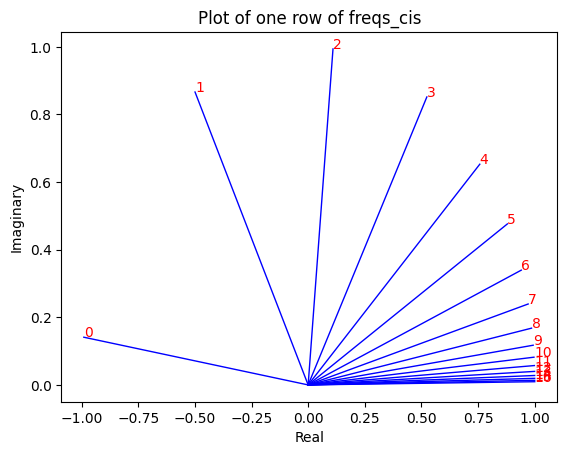

In [21]:
from matplotlib import pyplot as plt
freqs_for_each_token = torch.outer(torch.arange(16), freqs)
freqs_cis = torch.polar(torch.ones_like(freqs_for_each_token), freqs_for_each_token)
freqs_cis.shape

# viewing tjhe third row of freqs_cis
value = freqs_cis[3]
plt.figure()
for i, element in enumerate(value[:17]):
    plt.plot([0, element.real], [0, element.imag], color='blue', linewidth=1, label=f"Index: {i}")
    plt.annotate(f"{i}", xy=(element.real, element.imag), color='red')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Plot of one row of freqs_cis')
plt.show()

now that we have a complex number (the angle change vector) for every token's query element
we can convert our queries (the one we split into pairs) as complex numbers and then dot product to rotate the query based on the position
honeslty this is beautiful to think about :)

In [22]:
q_per_token_as_complex_numbers = torch.view_as_complex(q_per_token_split_into_pairs)
q_per_token_as_complex_numbers.shape

torch.Size([16, 32])

In [23]:
q_per_token_as_complex_numbers_rotated = q_per_token_as_complex_numbers * freqs_cis
q_per_token_as_complex_numbers_rotated.shape

torch.Size([16, 32])

after rotated vector is obtained
we can get back our the queries as pairs by viewing the complex numbers as real numbers again

In [24]:
q_per_token_split_into_pairs_rotated = torch.view_as_real(q_per_token_as_complex_numbers_rotated)
q_per_token_split_into_pairs_rotated.shape

torch.Size([16, 32, 2])

the rotated pairs are now merged, we now have a new query vector (rotated query vector) that is of the shape [17x128] where 17 is the number of tokens and the 128 is the dim of the query vector

In [25]:
q_per_token_rotated = q_per_token_split_into_pairs_rotated.view(q_per_token.shape)
q_per_token_rotated.shape

torch.Size([16, 64])